In [50]:
# Plot events on the map of a subarray (A or B)

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from os.path import join

In [51]:
## Inputs
arname = "A" # "A" or "B"

root = "../data"
timewin_hm = "2020-01-25-12-00-00"
timewin_ev = "2020-01-13-09-00-00"

hmname = "Hammer1"
evname = "Example1"

In [52]:
## Read the station locations
inpath = join(root, "stations.dat")

stdf = pd.read_csv(inpath, sep=" ")

In [53]:
## Read the hammer and event locations
### Hammer
inpath = join(root, timewin_hm, f"EventInfo_{hmname}.dat")
hmdf = pd.read_csv(inpath, sep=" ")

### Event
inpath = join(root, timewin_ev, f"EventInfo_{evname}.dat")
evdf = pd.read_csv(inpath, sep=" ")

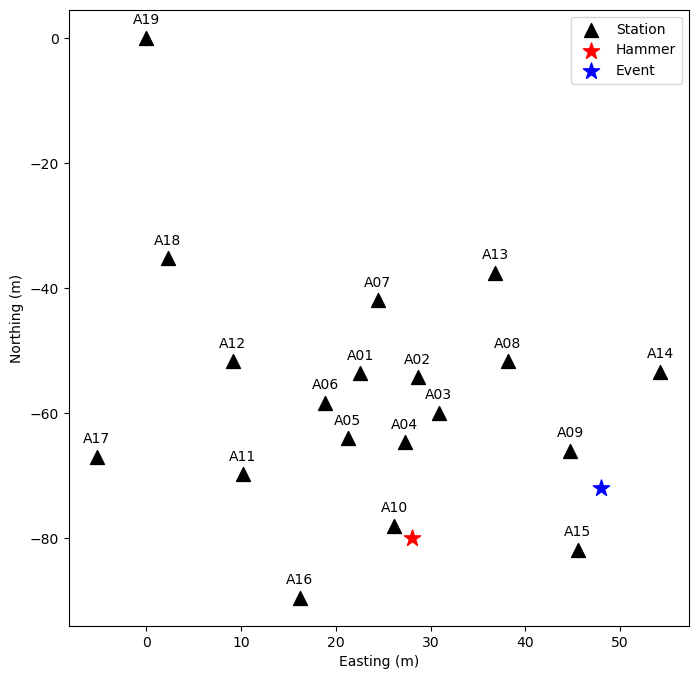

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))

if arname == "A":
    stdf_plot = stdf.loc[stdf["name"].str.startswith("A")]
else:
    stdf_plot = stdf.loc[stdf["name"].str.startswith("B")]

ax.scatter(stdf_plot["easting"], stdf_plot["northing"], marker="^", color="k", s=100, label="Station")

for ind, row in stdf_plot.iterrows():
    ax.annotate(row["name"], (row["easting"], row["northing"]), textcoords="offset points", xytext=(0,10), ha='center')

# Plot hammer locations
ax.scatter(hmdf["easting"], hmdf["northing"], marker="*", color="r", s=150, label="Hammer")

# Plot event location
ax.scatter(evdf["easting"], evdf["northing"], marker="*", color="b", s=150, label="Event")

ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
plt.legend()

outpath = join(root, f"EventMap_Array{arname}.png")
fig.savefig(outpath, dpi=300, bbox_inches="tight", transparent=True)

